<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/Machine%20Learning%20%26%20Deep%20Learning%20Projects/CNN_for_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#importing dependances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

# Data Preprocessing

In [2]:
#importing the dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


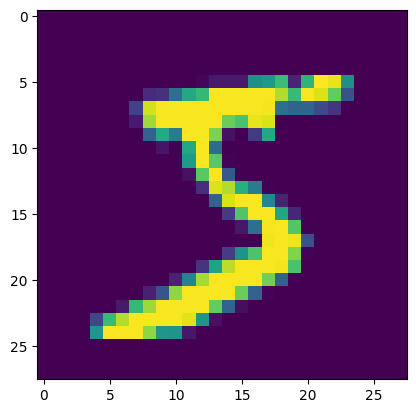

In [3]:
plt.imshow(X_train[0])

In [4]:
y_train[0]

5

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_train.min(), X_train.max()

(0, 255)

In [7]:
y_train.min(), y_train.max()

(0, 9)

In [8]:
# scale the images
X_train = X_train/255.0
X_test =  X_test/255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [9]:
# reshape the images
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
input_shape = X_train[0].shape
input_shape

(28, 28, 1)

# Building the Model

In [11]:
#initialise the model object
model = tf.keras.models.Sequential()

#add first CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

#add second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

#add maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

#add dropout layer
model.add(tf.keras.layers.Dropout(0.4))

#add flatten layer
model.add(tf.keras.layers.Flatten())

#add fully connected (dense) layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

#add output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [12]:
#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Training the model

In [13]:
history  = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 14s 13ms/step - loss: 0.1693 - sparse_categorical_accuracy: 0.9480 - val_loss: 0.0473 - val_sparse_categorical_accuracy: 0.9839
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0499 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.0362 - val_sparse_categorical_accuracy: 0.9878
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0330 - val_sparse_categorical_accuracy: 0.9887
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0263 - sparse_categorical_accuracy: 0.9915 - val_loss: 0.0308 - val_sparse_categorical_accuracy: 0.9897
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0197 - sparse_categorical_accuracy: 0.9932 - val_loss: 0.0316 - val_sparse_categorical_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0170 - sparse_cat

In [16]:
# model predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [20]:
y_pred[7], y_test[7]

(9, 9)

In [22]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 975,    1,    0,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1127,    0,    0,    0,    2,    3,    3,    0,    0],
       [   1,    1, 1021,    0,    1,    0,    0,    8,    0,    0],
       [   0,    0,    2, 1003,    0,    4,    0,    1,    0,    0],
       [   0,    0,    0,    0,  973,    0,    5,    0,    0,    4],
       [   0,    0,    1,    5,    0,  882,    4,    0,    0,    0],
       [   2,    1,    0,    0,    1,    0,  954,    0,    0,    0],
       [   0,    0,    8,    0,    0,    0,    0, 1018,    1,    1],
       [   1,    0,    5,    2,    0,    3,    3,    7,  951,    2],
       [   1,    0,    1,    1,    7,    2,    0,    8,    0,  989]])

In [23]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9893

# Plot Learning curve

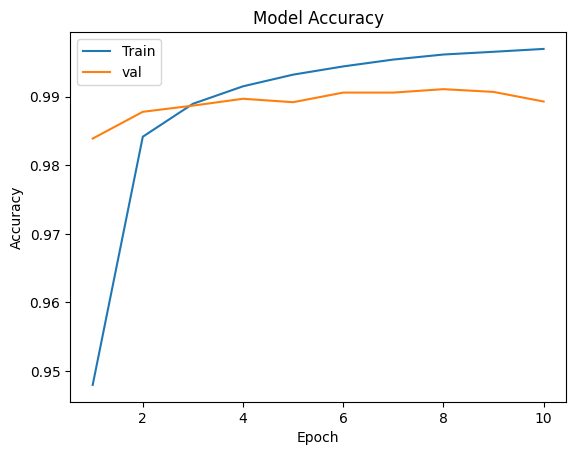

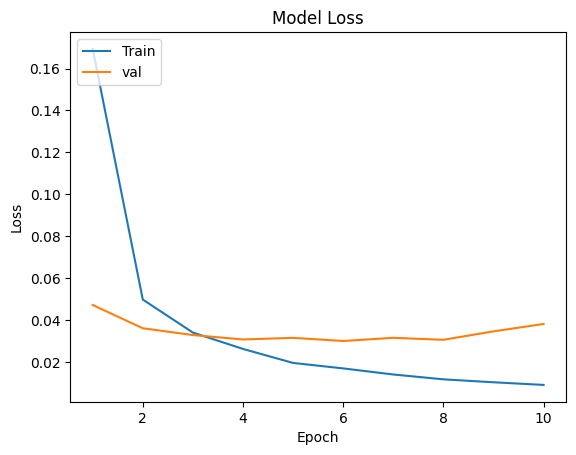

In [24]:
def learning_curve(history, epoch):
  #training vs validation accuracy
  epoch_range = range(1, epoch+1 )
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

learning_curve(history, 10)